# Problem Statement

### DNN Medical Imaging Research
I’m an independent researcher seeking a Research Assistant/Collaborator for phase 2 of my work on retinal disease screening. The data has already been split into train, validation, and test sets (but the images will need to be downloaded). The code for the necessary functions, including for preprocessing, have also been written.

Your main job is to conduct training experiments (using pre-written code), fine-tune and optimize the best performing model(s). More details will be provided in the experiment design document and shared with shortlisted candidates.

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from keras.preprocessing import image

In [2]:
import pandas as pd

dataset_path = r"C:/Users/Ritesh/Downloads/archive (21)"  # Path to the main dataset folder
train_labels_file = r"C:/Users/Ritesh/Downloads/archive (21)/Training_Set/Training_Set/RFMiD_Training_Labels.csv"  # Path to the train labels CSV file
val_labels_file = r"C:/Users/Ritesh/Downloads/archive (21)/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv"  # Path to the validation labels CSV file
test_labels_file = r"C:/Users/Ritesh/Downloads/archive (21)/Test_Set/Test_Set/RFMiD_Testing_Labels.csv"  # Path to the test labels CSV file

# Read the labels CSV files
train_df = pd.read_csv(train_labels_file)
val_df = pd.read_csv(val_labels_file)
test_df = pd.read_csv(test_labels_file)

# Update the image paths based on your dataset folder structure
train_df['img_path'] = [f"C:/Users/Ritesh/Downloads/archive (21)/Training_Set/Training_Set/Training/{id}.png" for id in train_df['ID']]
val_df['img_path'] = [f"C:/Users/Ritesh/Downloads/archive (21)/Evaluation_Set/Evaluation_Set/Validation/{id}.png" for id in val_df['ID']]
test_df['img_path'] = [f"C:/Users/Ritesh/Downloads/archive (21)/Test_Set/Test_Set/Test/{id}.png" for id in test_df['ID']]

In [3]:
train_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/Ritesh/Downloads/archive (21)/Trainin...


In [4]:
train_df['img_path'].head()

0    C:/Users/Ritesh/Downloads/archive (21)/Trainin...
1    C:/Users/Ritesh/Downloads/archive (21)/Trainin...
2    C:/Users/Ritesh/Downloads/archive (21)/Trainin...
3    C:/Users/Ritesh/Downloads/archive (21)/Trainin...
4    C:/Users/Ritesh/Downloads/archive (21)/Trainin...
Name: img_path, dtype: object

In [5]:
train_df = train_df.drop(labels=['ID'],axis=1)

In [6]:
columns = list(train_df.columns)
columns.remove('img_path')
d_total = 0
for col in columns:
    print(col)
    print(train_df[col].value_counts())
    print('----------------')
    if col != 'Disease_Risk' and col!='ID':
        d_total += train_df[col].sum()
        
print(d_total)

Disease_Risk
1    1519
0     401
Name: Disease_Risk, dtype: int64
----------------
DR
0    1544
1     376
Name: DR, dtype: int64
----------------
ARMD
0    1820
1     100
Name: ARMD, dtype: int64
----------------
MH
0    1603
1     317
Name: MH, dtype: int64
----------------
DN
0    1782
1     138
Name: DN, dtype: int64
----------------
MYA
0    1819
1     101
Name: MYA, dtype: int64
----------------
BRVO
0    1847
1      73
Name: BRVO, dtype: int64
----------------
TSLN
0    1734
1     186
Name: TSLN, dtype: int64
----------------
ERM
0    1906
1      14
Name: ERM, dtype: int64
----------------
LS
0    1873
1      47
Name: LS, dtype: int64
----------------
MS
0    1905
1      15
Name: MS, dtype: int64
----------------
CSR
0    1883
1      37
Name: CSR, dtype: int64
----------------
ODC
0    1638
1     282
Name: ODC, dtype: int64
----------------
CRVO
0    1892
1      28
Name: CRVO, dtype: int64
----------------
TV
0    1914
1       6
Name: TV, dtype: int64
----------------
AH
0    190

In [7]:
train_df = train_df.drop(labels=['Disease_Risk','ODPM', 'HR'], axis=1)
val_df = val_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)
test_df = test_df.drop(labels=['ID', 'Disease_Risk', 'ODPM', 'HR'], axis=1)

In [8]:
train_df.columns

Index(['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT',
       'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS', 'CB', 'PRH',
       'MNF', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO',
       'PLQ', 'HPED', 'CL', 'img_path'],
      dtype='object')

In [9]:
def weight_calc(col):
    total = len(train_df)
    weight = (1 / train_df[col].sum()) *  total / 2
    return weight

In [10]:
Y_train = list(train_df.drop(['img_path'], axis=1).columns)
Y_val = list(val_df.drop(['img_path'], axis=1).columns)
Y_test = list(test_df.drop(['img_path'], axis=1).columns)
unq_disease = len(Y_train)

In [11]:
train_df.columns

Index(['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT',
       'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS', 'CB', 'PRH',
       'MNF', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO',
       'PLQ', 'HPED', 'CL', 'img_path'],
      dtype='object')

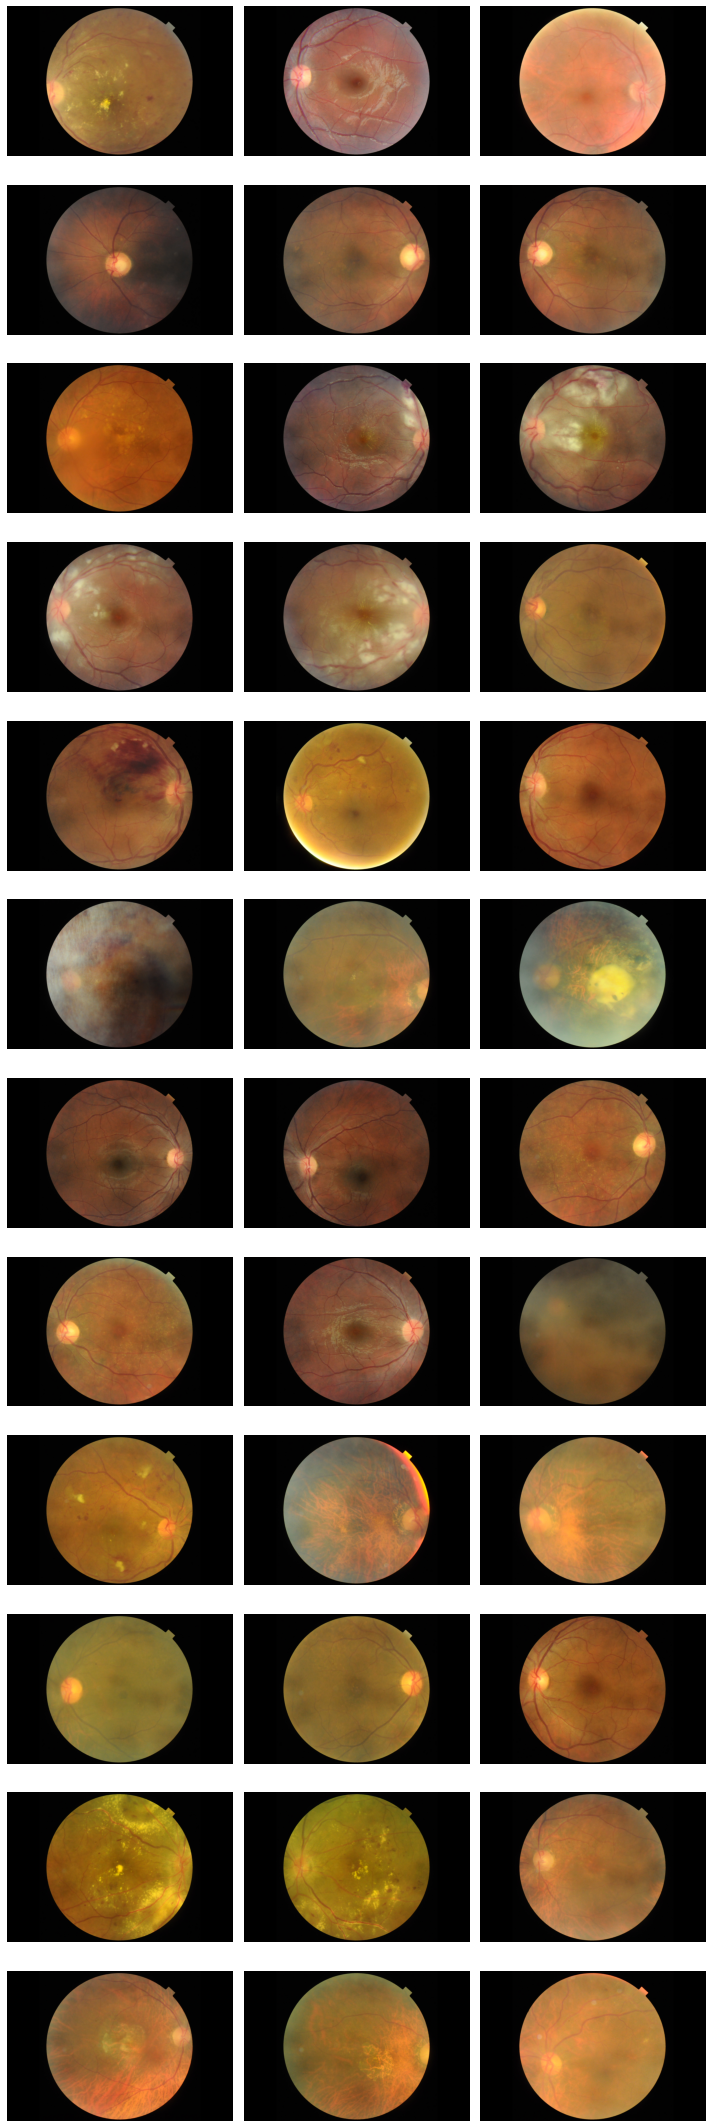

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_folder = r"C:\Users\Ritesh\Downloads\archive (21)\Training_Set\Training_Set\Training"

image_files = os.listdir(image_folder)
fig, axes = plt.subplots(12, 3, figsize=(10, 30))
for ax, image_file in zip(axes.flatten(), image_files):
    # Construct the full image file path
    img_path = os.path.join(image_folder, image_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
train_df['img_path'][0]

'C:/Users/Ritesh/Downloads/archive (21)/Training_Set/Training_Set/Training/1.png'

In [14]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                                brightness_range=[0, 0.1])
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# The value for class_mode in flow_from_dataframe MUST be 'raw' if you are attempting to do multilabel classification.
train_gen = train_datagen.flow_from_dataframe(train_df, 
                                              x_col='img_path', 
                                              y_col=Y_train,
                                              target_size=(150,150),
                                              class_mode='raw',
                                              batch_size=16,
                                              shuffle=True)
val_gen = val_datagen.flow_from_dataframe(val_df,
                                          x_col='img_path',
                                          y_col=Y_val,
                                          target_size=(150,150),
                                          class_mode='raw',
                                          batch_size=8)
test_gen = test_datagen.flow_from_dataframe(test_df,
                                            x_col='img_path',
                                            y_col=Y_test,
                                            target_size=(150,150),
                                            class_mode='raw')

Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


## Model Building using U-NET


#### U-Net is a popular deep learning architecture used for image segmentation tasks. It is called U-Net due to its U-shaped architecture, consisting of a contracting path for capturing context and a corresponding expanding path for recovering spatial resolution. U-Net is widely used in medical image segmentation because it effectively combines feature extraction and pixel-level classification, making it suitable for tasks where precise localization of objects within images is required.U-Net is commonly used in medical imaging tasks due to its effectiveness in segmenting and analyzing medical images

In [15]:
def UNet(inputs):
    # First convolution block
    x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    d1_con = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    d1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d1_con)
    
    # Second convolution block
    d2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d1)
    d2_con = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d2_con)
    #Third convolutional block
    d3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d2)
    d3_con = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d3 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d3_con)
    
    # Fourth convolution block
    d4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d3)
    d4_con = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    d4 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(d4_con)
    
    # Bottleneck layer
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(d4)
    b = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(b)
     # First upsampling block
    u1 = tf.keras.layers.Conv2DTranspose(512, 3, strides =(2,2),padding='same')(b)
    u1 = tf.keras.layers.Concatenate(axis=3)([u1, d4_con])
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    u1 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u1)
    
    # Second upsampling block
    u2 = tf.keras.layers.Conv2DTranspose(256, 3, strides =(2,2),padding='valid')(u1)
    u2 = tf.keras.layers.Concatenate(axis=3)([u2, d3_con])
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    u2 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u2)
    # Third upsampling block
    u3 = tf.keras.layers.Conv2DTranspose(128, 3, strides =(2,2),padding='valid')(u2)
    u3 = tf.keras.layers.Concatenate(axis=3)([u3, d2_con])
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    u3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u3)
    
    # Fourth upsampling block
    u4 = tf.keras.layers.Conv2DTranspose(64, 3, strides =(2,2),padding='same')(u3)
    u4 = tf.keras.layers.Concatenate(axis=3)([u4, d1_con])
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    u4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(u4)
    
    # Flatten and output
    flat = tf.keras.layers.Flatten()(u4)
    out = tf.keras.layers.Dense(units=unq_disease, activation='sigmoid')(flat)
    model = tf.keras.Model(inputs=[inputs], outputs=[out])
    return model

In [16]:
auc = tf.keras.metrics.AUC(multi_label=True,thresholds=[0,0.5])
aucpr = tf.keras.metrics.AUC(curve='PR',multi_label=True,thresholds=[0,0.5])
inputs = tf.keras.layers.Input(shape=(150,150,3))
unet = UNet(inputs)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc, aucpr])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 150, 150, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 150, 150, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

Total params: 96,433,323
Trainable params: 96,433,323
Non-trainable params: 0
__________________________________________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
unet.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
120/120 [==============================] - 1587s 13s/step - loss: 0.1065 - auc: 0.4996 - auc_1: 0.0259 - val_loss: 0.3522 - val_auc: 0.4440 - val_auc_1: 0.0263
Epoch 2/10
120/120 [==============================] - 1553s 13s/step - loss: 0.0922 - auc: 0.5006 - auc_1: 0.0261 - val_loss: 0.2184 - val_auc: 0.4446 - val_auc_1: 0.0271
Epoch 3/10
120/120 [==============================] - 1549s 13s/step - loss: 0.0909 - auc: 0.5013 - auc_1: 0.0272 - val_loss: 0.3674 - val_auc: 0.4458 - val_auc_1: 0.0270
Epoch 4/10
120/120 [==============================] - 1663s 14s/step - loss: 0.0894 - auc: 0.5017 - auc_1: 0.0277 - val_loss: 0.3305 - val_auc: 0.4556 - val_auc_1: 0.0317
Epoch 5/10
120/120 [==============================] - 1651s 14s/step - loss: 0.0888 - auc: 0.5019 - auc_1: 0.0282 - val_loss: 0.1145 - val_auc: 0.4509 - val_auc_1: 0.0332
Epoch 6/10
120/120 [==============================] - 1645s 14s/step - loss: 0.0880 - auc: 0.5034 - auc_1: 0.0301 - val_loss: 0.3204 - val_auc: 0

In [19]:
unet.evaluate(test_gen)

20/20 [==============================] - 102s 5s/step - loss: 0.0900 - auc: 0.4070 - auc_1: 0.0243


[0.09003040939569473, 0.40697672963142395, 0.024273253977298737]